In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd 
import math
import datetime
import platform

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.12
Tensorflow version: 2.6.4
Keras version: 2.6.0


In [3]:
%load_ext tensorboard

In [4]:
!rm -rf ./.logs/

In [5]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [8]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [9]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

In [10]:
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


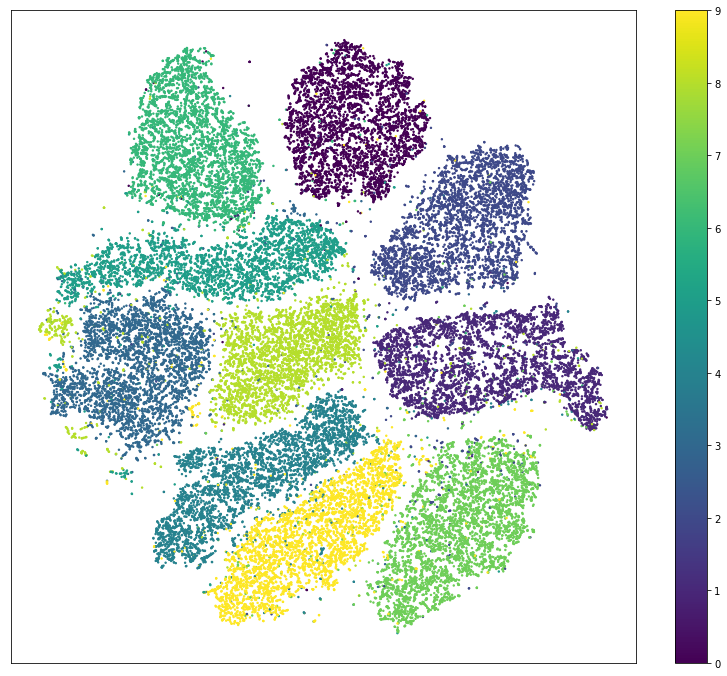

In [11]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [13]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [14]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [15]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [16]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [17]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


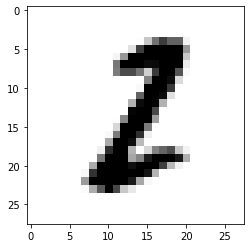

In [18]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

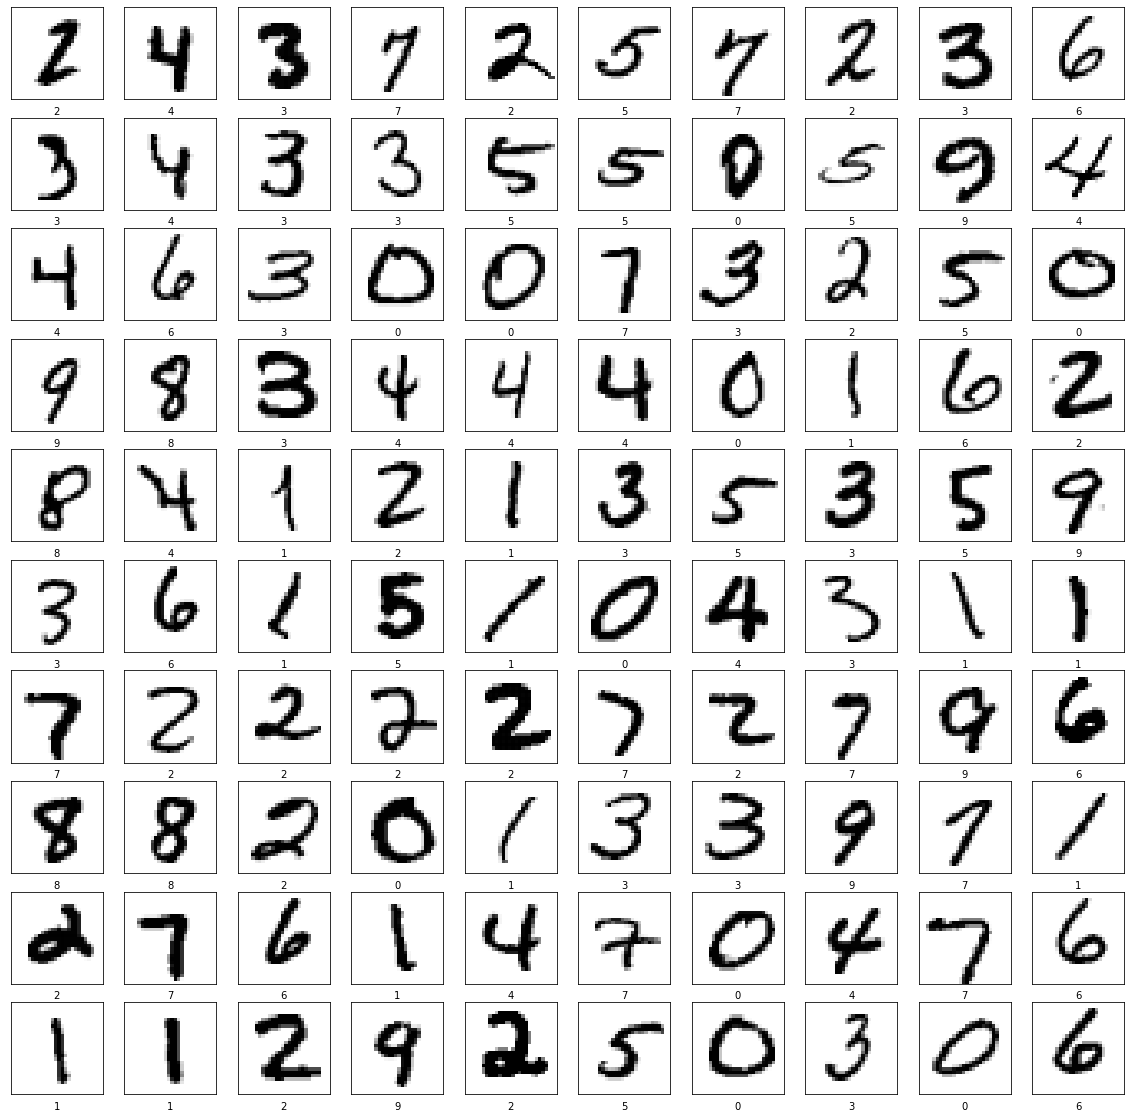

In [19]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [20]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [21]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [22]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [23]:
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [24]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

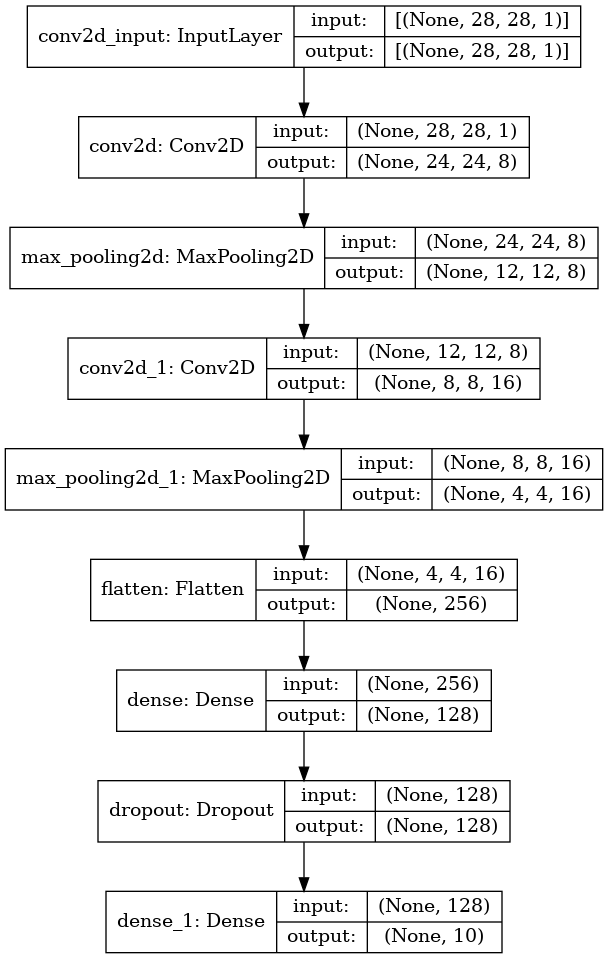

In [26]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [27]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [28]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2722 - accuracy: 0.9155 - val_loss: 0.0906 - val_accuracy: 0.9715
Epoch 2/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0937 - accuracy: 0.9706 - val_loss: 0.0592 - val_accuracy: 0.9805
Epoch 3/10
1050/1050 [==============================] - 8s 7ms/step - loss: 0.0677 - accuracy: 0.9780 - val_loss: 0.0538 - val_accuracy: 0.9837
Epoch 4/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0540 - accuracy: 0.9838 - val_loss: 0.0536 - val_accuracy: 0.9826
Epoch 5/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.0581 - val_accuracy: 0.9831
Epoch 6/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0614 - val_accuracy: 0.9835
Epoch 7/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0505 - val_accuracy:

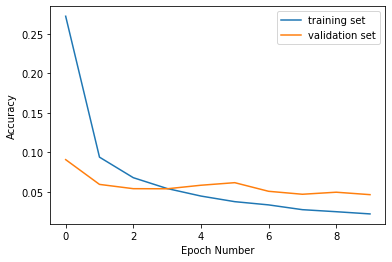

In [29]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

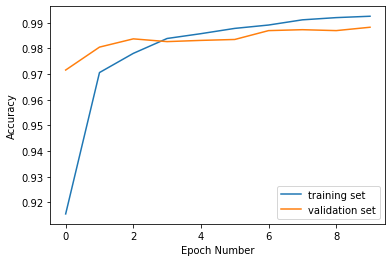

In [30]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [31]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [32]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.009457636624574661
Train accuracy:  0.997083306312561


In [33]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [34]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04620610177516937
Validation accuracy:  0.9882143139839172


In [35]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [36]:
loaded_model = tf.keras.models.load_model(model_name)

In [37]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

In [38]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [39]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.445287e-12,1.000000e+00,1.273316e-08,4.486254e-16,9.648053e-11,5.372703e-16,1.091529e-11,9.215566e-11,1.230895e-09,7.523314e-12
1,3.423927e-14,2.803939e-08,6.384955e-09,9.999985e-01,2.816049e-10,7.357247e-08,3.700956e-17,1.003273e-08,5.267613e-08,1.393411e-06
2,3.674761e-12,1.069400e-08,1.582989e-06,4.811205e-07,3.702504e-11,1.492647e-07,4.516688e-09,5.746156e-11,9.999977e-01,5.188451e-10
3,1.911169e-10,9.999999e-01,1.023089e-08,1.113897e-10,4.786545e-08,1.116511e-11,1.756540e-09,5.001553e-08,1.431788e-09,1.470295e-09
4,8.711532e-15,3.918969e-12,6.569930e-11,1.983659e-07,1.910569e-05,2.082519e-10,1.088755e-16,5.717323e-05,1.971353e-06,9.999214e-01
...,...,...,...,...,...,...,...,...,...,...
8395,3.323371e-18,2.695048e-13,3.296938e-13,3.872389e-20,1.000000e+00,1.464947e-18,5.598293e-15,5.814506e-17,3.677419e-16,1.778504e-13
8396,1.397045e-13,4.324542e-14,1.367586e-19,3.285891e-12,2.875912e-15,1.000000e+00,1.883439e-10,7.297530e-18,1.063797e-09,4.392485e-18
8397,6.655600e-14,2.142172e-10,6.760392e-12,5.472754e-10,3.945454e-08,1.286267e-10,2.020679e-15,9.999999e-01,2.579864e-11,1.217333e-07
8398,7.035673e-08,5.640861e-15,6.040093e-14,1.198207e-10,3.117203e-13,8.893461e-07,9.999990e-01,5.407709e-18,6.399610e-10,5.063092e-16


In [40]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


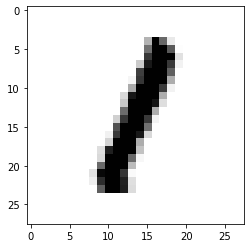

In [41]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

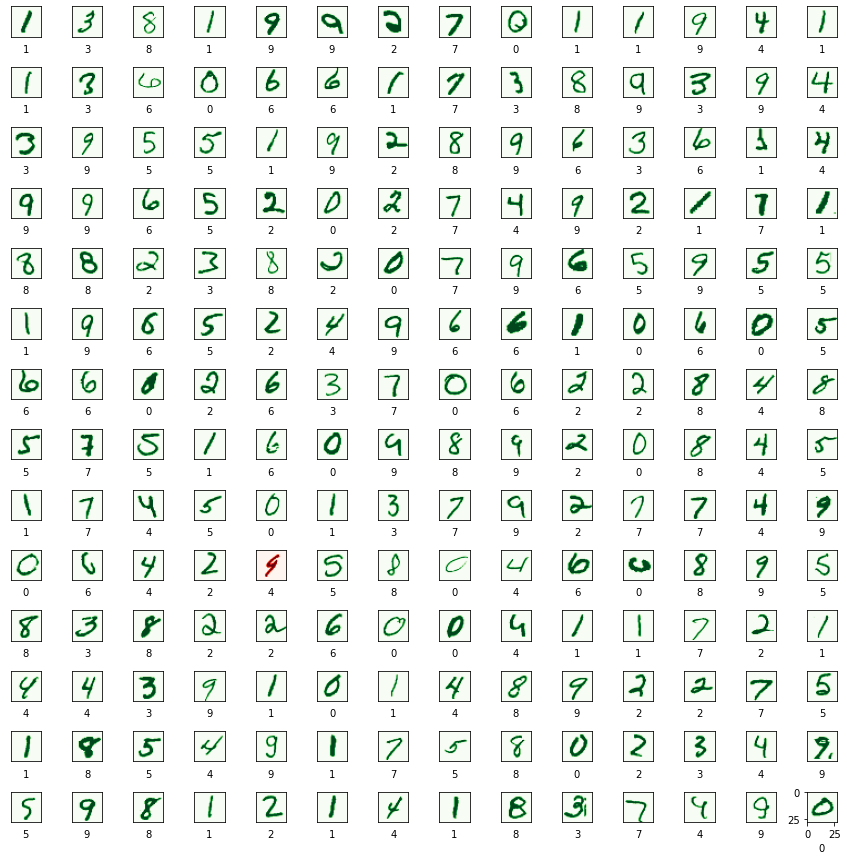

In [42]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

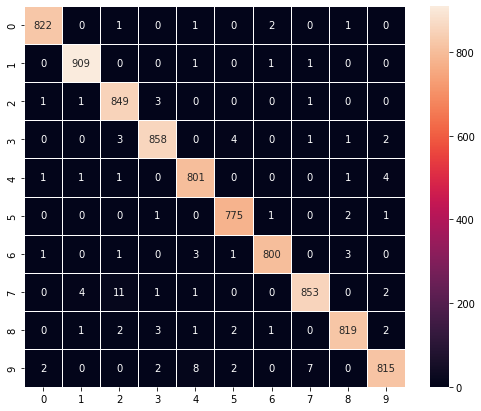

In [43]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [44]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (28000, 10)


In [45]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.178007e-11,2.240164e-11,1.000000e+00,1.063459e-08,2.053576e-13,5.250149e-15,8.346151e-13,4.003460e-12,2.379749e-11,6.929229e-16
1,9.999750e-01,2.254466e-08,1.695860e-06,2.423970e-07,2.644428e-09,4.705358e-06,1.476781e-05,3.154471e-07,2.066552e-07,3.162537e-06
2,7.949633e-11,1.215238e-07,4.900727e-08,5.646020e-06,8.035391e-05,1.748125e-08,7.341092e-12,6.082510e-06,1.407995e-04,9.997670e-01
3,3.222679e-02,3.043074e-09,3.046226e-04,3.938366e-06,4.283933e-04,1.816278e-07,5.490875e-07,1.530867e-06,3.914097e-05,9.669948e-01
4,6.940396e-15,1.354964e-10,2.697884e-08,1.000000e+00,3.224936e-16,1.037354e-10,1.741589e-15,3.038148e-11,3.551901e-11,1.673219e-12
...,...,...,...,...,...,...,...,...,...,...
27995,1.169609e-15,8.797614e-15,9.434750e-16,1.880824e-08,7.401320e-06,2.271203e-10,1.163199e-20,3.094166e-08,4.763608e-10,9.999925e-01
27996,1.646950e-10,4.774407e-09,9.815835e-07,1.899566e-07,3.310520e-08,1.024395e-10,1.739740e-15,9.999905e-01,9.185062e-12,8.256296e-06
27997,2.190050e-22,1.477121e-14,3.275798e-15,1.000000e+00,4.309161e-22,1.535902e-13,1.519004e-26,2.759000e-14,2.787665e-14,2.192265e-14
27998,1.064520e-09,2.375684e-08,2.021403e-09,4.229579e-07,3.008579e-04,2.093603e-10,8.450972e-14,2.434104e-03,4.307064e-11,9.972646e-01


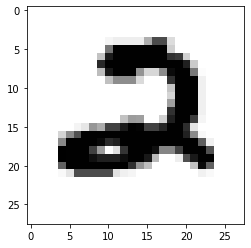

In [46]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [47]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
